In [2]:
import pandas as pd
import json_tricks as json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
def nn(inputs, weights):
    for w in weights:
        inputs = np.concatenate((inputs, [1]))  # add bias
        inputs = np.tanh(np.inner(inputs,w))  # and Neural it !
    return inputs

In [61]:
def genome2weights(genome):
    nbweightperlayer_choose = [4, 3, 1]
    nbweightperlayer_coop = [1, 2, 1]
    lw_choose = []
    lw_coop = []
    browsed = 0
    for inn, outn in zip(nbweightperlayer_choose, nbweightperlayer_choose[1:]):
        inn += 1
        toeat = inn*outn
        mat = np.array(genome[browsed:(browsed+toeat)])
        mat = mat.reshape((outn, inn))
        lw_choose.append(mat)
        browsed += toeat
    for inn, outn in zip(nbweightperlayer_coop, nbweightperlayer_coop[1:]):
        inn += 1
        toeat = inn*outn
        mat = np.array(genome[browsed:(browsed+toeat)]).reshape((outn, inn))
        lw_coop.append(mat)
        browsed += toeat
    assert(browsed == len(genome))
    return lw_choose, lw_coop

In [189]:
gen = json.load(open('/data/log/lioncrashfric2.5b8test2/rep00/genomes_10249.txt'))[20]

In [190]:
choose, coop = genome2weights(gen)

In [191]:
inputs = np.array([1, 1/100, 6/10, 10/10])

In [192]:
nn(inputs, choose)

array([0.9999999])

In [199]:
inputs = [80]
(nn(inputs, coop)[0] + 1) / 2 * 10

9.999925875791318

In [202]:
out = []
for nbpart in range(0, 11):
    indcoop = (nn([nbpart], coop)[0] + 1) / 2 * 10
    for coopperind in range(0, 11):
        inputs = np.array([1, nbpart / 100, coopperind * nbpart / 10, indcoop / 10])
        score = nn(inputs, choose)[0]
        out.append({'nbpart': nbpart, 'x0': coopperind, 'score': score})

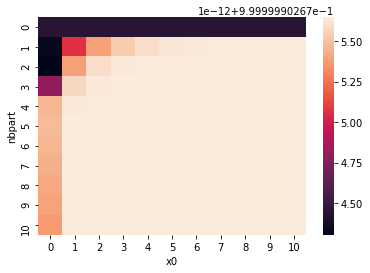

In [203]:
sns.heatmap(pd.DataFrame(out).pivot_table('score', 'nbpart', 'x0'))